### Have a first look at the data - plots of the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plx
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt

Load the data from the memory store.

In [2]:
%store -r df

First we may want to know which amounts of salary appear how often amongst the 474 observations.

In [4]:
fig = plx.histogram(df,
    x = "SALARY",
    title = "Distribution of salaries"
)
fig = go.Figure(fig)
#fig.write_image("plots/distribution_of_salaries.png")
fig.show()

In [65]:
fig = plx.violin(df, y="SALARY")
fig.show()

The salary is concentrated between 20.000,- and 40.000 (propbably $) with the median at 28.875,- and the 75% quartile of the observations having a salary less than 37.000,-.

But there are some salaries which outline this by the factor 3-4 and grossing up to 135.000,-

To have first overview on the categorial features (`gender`, `minority`, `job category`) and their relations to the target variable we can use the pairplot method of seaborn.

<Figure size 144x360 with 0 Axes>

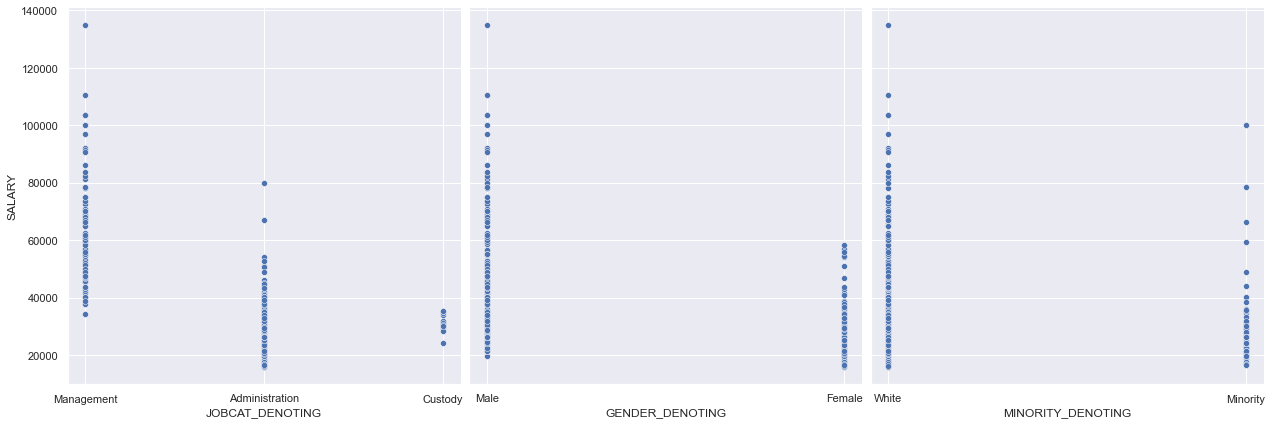

In [40]:
plt.figure(figsize=(2,5))

sns.pairplot(
    df,
    x_vars = ["JOBCAT_DENOTING", "GENDER_DENOTING", "MINORITY_DENOTING"], 
    y_vars = "SALARY",
    height=6
)

This hints a decisive difference in the salary depending 

a) on the `job category` one has (the management has a broader range an gets more than the administarion and the custody, while the custody has a very sharp range of salaries), and

b) on the `gender` which looks as if it implicates ones again: if you are classified of beeing female, well you probably going to be less paid than a male, and

b) for the `gender` category quite the same: getting classified of beeing not white you also probably going to be less paid than a white person.

Next we may take a look at the numeric features we have, the `education degree` and the `entry wage`:

In [41]:
fig = plx.scatter(df,
    x = "EDUC", 
    y = "SALARY", 
    color = "SALBEGIN",
    title = "Impact of Education and Entry Wage on Salary"
)
fig.update_traces(marker_size=10)
fig.show()

This plot hints that having a lesser number of years in education your salary is goint to be very narrowed in a rather sharp range.

And on the other hand: If you start already with an higher entry wage you probably going to have an even higher raise in absolute numbers than someone who starts with a lower salary at the beginning.

In the end we may take a look at the `sociodemographic` features.

In [43]:
alt.Chart(df).mark_point(size=60).encode(
    x=alt.X("MINORITY_DENOTING", axis = alt.Axis(labelAngle=0)),
    y = alt.Y("SALARY"),
    color = "GENDER_DENOTING",
    column = "JOBCAT_DENOTING"
).properties(
    title = "Impact of Sociodemography on Salary",
    width = 200
    )

alt.Chart(...)

Here you can see:

- The administration is quite diverse in its `sociodemographic` background but it looks like as if persons who are classified as beeing male get a higher salary.
- The custody unit has for all its employees a nearly consistent salary.  
- To be part of the management (the bank unit with the highest salaries) means you most likely should be categorized as white and male.